<a href="https://colab.research.google.com/github/ThalesCavalcanti/MachineLearningGroundwork/blob/main/Parte_1_6_Classificac%CC%A7a%CC%83o_Regressa%CC%83o_logi%CC%81stica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

Reconecte ao Drive.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
DRIVE_DIRECTORY = "curso_ml"
DRIVE_DIRECTORY = os.path.join("/content/drive/MyDrive/cursoML", DRIVE_DIRECTORY)

---

In [3]:
import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix

# Regressão Logística

Comece recuperando os dados preditores, de treino e de teste, a partir do arquivo `cover_type.pkl` salvo na pasta do Drive. Lembre-se de que você deve instanciar as variáveis `X` e `y`, dos splits `train` e `test`,  na mesma ordem que salvou.

In [4]:
with open(os.path.join(DRIVE_DIRECTORY, 'cover_type.pkl'), "rb") as f:
  X_train, y_train, X_test, y_test = pickle.load(f)

Instancie e ajuste um classificador do tipo `LogisticRegression`. Para garantir reprodutibilidade, informe `random_state=0` ao construtor.

In [5]:
lr_classifier = LogisticRegression(random_state=0)
lr_classifier.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

Você deve receber um aviso de que o algoritmo não convergiu. Não se preocupe, isso significa que ou o algoritmo ou os parâmetros utilizados não são adequados para nosso dataset, mas isso faz parte da nossa pesquisa pelo melhor classificador.

Exiba os interceptos determinados pelo algoritmo.

In [6]:
lr_classifier.intercept_

array([ 0.39444079, -4.48811593, -1.4396563 , -1.41949224,  4.86885562,
       -2.00531638,  4.08928444])

Exiba os coeficientes determinados pelo algoritmo.

In [7]:
lr_classifier.coef_

array([[-1.46217758e-01,  3.36102785e-04,  7.22845111e-02,
        -2.68201907e-01,  3.32154775e-01, -7.21473231e-01,
         1.02185225e-01,  2.22835747e-01, -1.17098886e-01,
        -1.03706102e-01,  1.19386381e+00, -2.51263295e-01,
         4.96009198e-01, -1.21807388e+00, -7.30220638e-02,
         1.07869550e-01, -8.99101763e-01, -1.87136725e-01,
        -5.38809199e-02, -3.81577594e-01, -1.40469868e-03,
        -6.91773475e-03, -6.00401154e-01, -2.11182717e-02,
         5.95753310e-01, -9.12934932e-01,  8.31664468e-01,
        -7.54425285e-02, -3.35080338e-01,  1.11504574e+00,
         7.80162545e-01,  3.18536583e-01, -3.62044414e-01,
        -4.03360310e-02, -5.56288652e-01, -2.14035688e-02,
        -2.14297285e-01, -7.15625216e-03, -2.58668412e-01,
        -1.12610387e-01, -1.86682567e-01,  6.73278334e-01,
         1.26505543e+00,  7.52185896e-01, -2.21607618e-01,
        -3.00112397e-01, -1.53134892e-01, -1.01407564e-02,
        -2.22837453e-03, -9.33364011e-04, -7.73314578e-0

Observe que, como este dataset representa um problema com mais de uma classe, cada uma as 7 classes apresenta sua própria coleção de coeficientes para os 54 atributos:

In [8]:
lr_classifier.coef_.shape

(7, 53)

Faça e exiba a predição no split de teste.

In [9]:
y_pred = lr_classifier.predict(X_test)

In [10]:
y_pred

array([4, 4, 1, ..., 4, 6, 5])

Calcule a acurácia.

In [11]:
accuracy_score(y_test, y_pred)

0.7216

Exiba a matriz de confusão.

0.7216

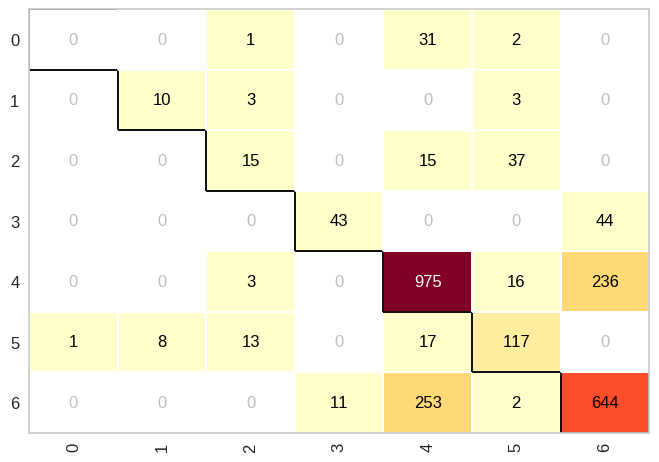

In [14]:
cm = ConfusionMatrix(lr_classifier)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

Exiba o reporte de classificação.

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        34
           1       0.56      0.62      0.59        16
           2       0.43      0.22      0.29        67
           3       0.80      0.49      0.61        87
           4       0.76      0.79      0.77      1230
           5       0.66      0.75      0.70       156
           6       0.70      0.71      0.70       910

    accuracy                           0.72      2500
   macro avg       0.56      0.51      0.52      2500
weighted avg       0.71      0.72      0.71      2500

